In [1]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/download?datasetVersionNumber=4")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danieldarbekov
Your Kaggle Key: ··········


100%|██████████| 2.55M/2.55M [00:00<00:00, 167MB/s]

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
df = pd.read_csv('/content/twitter-airline-sentiment/Tweets.csv')
df.tail(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<ipython-input-136-c44aeaa9da37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Axes: xlabel='airline_sentiment', ylabel='count'>

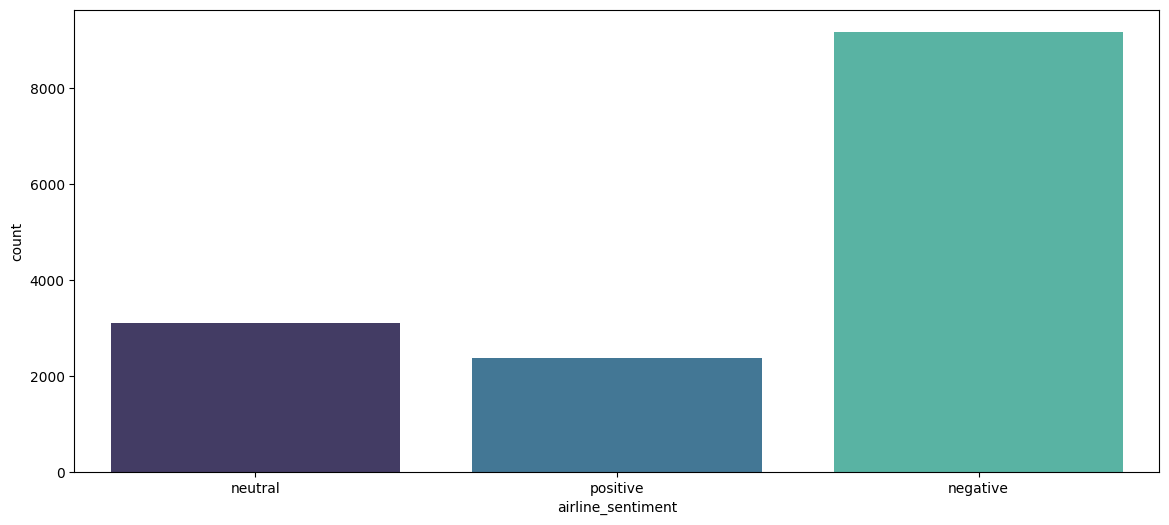

In [136]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['airline_sentiment'], palette='mako')

<ipython-input-154-cf6ab9cd0842>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



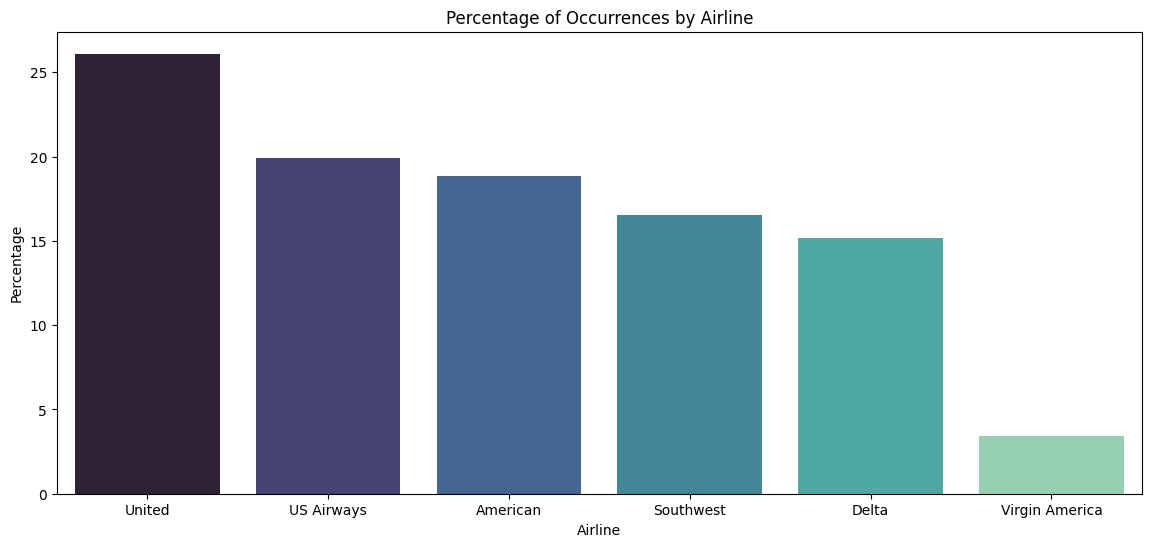

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

airline_counts = df['airline'].value_counts()
total_count = airline_counts.sum()
airline_percentages = airline_counts / total_count * 100

plt.figure(figsize=(14,6))
sns.barplot(x=airline_percentages.index, y=airline_percentages.values, palette='mako')
plt.title('Percentage of Occurrences by Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


In [119]:
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0).reset_index()


sentiment_counts_melt = sentiment_counts.melt(id_vars='airline', var_name='sentiment', value_name='count')

fig = px.bar(sentiment_counts_melt, x='airline', y='count', color='sentiment', barmode='stack',
             labels={'count': 'Number of Tweets', 'airline': 'Airline', 'sentiment': 'Sentiment'},
             title='Sentiment Analysis of Tweets by Airline')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [169]:
airline_counts = df[df['airline_sentiment'] == 'positive']['airline'].value_counts()
total_count = airline_counts.sum()
airline_percentages = airline_counts / total_count * 100
fig1 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='positive'], x=airline_percentages, y="airline", title='Most Great Airline By Tweets By Percentage', orientation='h',color='airline')
fig2 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='positive'], x='count', y="airline", title='Most Great Airline By Tweets By Counts', orientation='h',color='airline')

fig1.show()
fig2.show()


In [170]:
airline_counts = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()
total_count = airline_counts.sum()
airline_percentages = airline_counts / total_count * 100
fig1 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='negative'], x=airline_percentages, y="airline", title='Most Worst Airline By Tweets By Percentage', orientation='h',color='airline')
fig2 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='negative'], x='count', y="airline", title='Most Worst Airline By Tweets By Counts', orientation='h',color='airline')

fig1.show()
fig2.show()


In [171]:
airline_counts = df[df['airline_sentiment'] == 'neutral']['airline'].value_counts()
total_count = airline_counts.sum()
airline_percentages = airline_counts / total_count * 100
fig1 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='neutral'], x=airline_percentages, y="airline", title='Most Neutral Airline By Tweets By Percentage', orientation='h',color='airline')
fig2 = px.bar(sentiment_counts_melt[sentiment_counts_melt['sentiment']=='neutral'], x='count', y="airline", title='Most Neutral Airline By Tweets By Counts', orientation='h',color='airline')

fig1.show()
fig2.show()


In [147]:
negative_reason_counts = df['negativereason'].dropna().value_counts()

negative_reason_counts_df = negative_reason_counts.reset_index()
negative_reason_counts_df.columns = ['negativereason', 'count']

fig = px.treemap(negative_reason_counts_df, path=['negativereason'], values='count',
                 title='Tree Of Most Common Negative Reasons')
fig.show()

In [184]:
import pandas as pd
import plotly.express as px

filtered_df = df[['negativereason', 'airline']].dropna()

filtered_counts = filtered_df.value_counts().reset_index()
filtered_counts.columns = ['negativereason', 'airline', 'count']

total_count = (df['airline_sentiment'] == 'negative').sum()

filtered_counts['percentage'] = filtered_counts['count'] / total_count * 100

fig = px.treemap(filtered_counts, path=['negativereason', 'airline'],
                 values='percentage', title='Treemap of Negative Reason by Percentage')
fig.show()


In [212]:
tweets = df[df['retweet_count']>0][['text','airline_sentiment']].dropna()
tweets.value_counts().reset_index().head(50)

,text,airline_sentiment,0
0,@AmericanAir I sure hope you all can fix @USAi...,negative,2
1,@AmericanAir r u serious?? 304min #delay with ...,negative,2
2,@united always happy to start my life with my ...,negative,1
3,"@united and most frustratingly, all this delay...",negative,1
4,"@united appreciate it, but changing time by 10...",negative,1
5,@united are you trying to break a world record...,negative,1
6,"@united as for volunteers to give up seats, pe...",negative,1
7,"@united assistance with what, the attitude of ...",negative,1
8,@united at its worse. Can't figure how to pack...,negative,1
9,@united bags arrived - I sure miss the custome...,negative,1


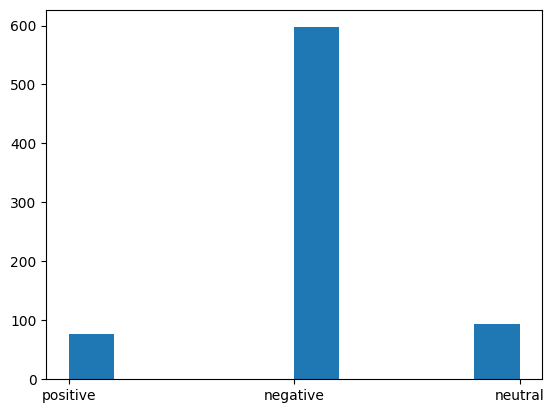

In [217]:
plt.hist( df[df['retweet_count']>0]['airline_sentiment'])
plt.show()